In [1]:
## import necessary modules
import glob 
import pandas as pd
from pprint import pprint
import os

In [2]:
## define years and quarters for processing data
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarters = [1,2,3,4]

## create a list of drugs of interest
## you need to modify this list as necessary
## the current drugs are for ADHD
## You can collect the list of drugs from an online website such as Drugs.com
adhd_drugs = ["symbicort", "budesonide","pulmicort", "theophylline", "3-dimethylxanthine"]

In [3]:
for year in years:
    for q in quarters:    
        ## get the file names with the designated patterns
        files = glob.glob('Data1/*' + str(year) +'*' + str(q) + '/ascii/*' + str(q) + '.txt',  
                           recursive = True) 
        for file in files: 
            print(file)
            ## read files according to their names
            if "demo" in file.lower():
                demo = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False) 
            elif "drug" in file.lower():
                drug = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False)
            elif "indi" in file.lower():
                indi = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "outc" in file.lower():
                outc = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "reac" in file.lower():
                reac = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
            elif "rpsr" in file.lower():
                rpsr = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "ther" in file.lower():
                ther = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
        ## create a mask for the data associated with ADHD
        ## delete the next statement if you want to have the entire data
        ## check "list comprehension", a new Python syntax, at the following site: 
        ## https://www.w3schools.com/python/python_lists_comprehension.asp
        mask_for_adhd = [str(med).lower() in adhd_drugs for med in drug["drugname"]]
        ## apply the mask to the columns and overwrite the drug table
        drug = drug[mask_for_adhd]
        ## join tables
        inner_join = pd.merge(left= demo, right = drug, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        ## change duplicate column names and remove one of them
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = indi, how = "inner", 
                      left_on = ["primaryid", "drug_seq"], right_on = ["primaryid", "indi_drug_seq"] )
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["indi_drug_seq"], axis= 1)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = reac, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        # drop the duplicate abbreviation column
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        # change column name
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        ## save the joined tables as csv files in the designated directories
        path = 'Result/' + str(year)+'/Quarterly'
        if not os.path.exists(path):
            os.makedirs(path)
        inner_join.to_csv(path + '/' + str(year) + '_' + str(q) + '.csv')

Data1\faers_ascii_2013q1\ascii\DEMO13Q1.txt
Data1\faers_ascii_2013q1\ascii\DRUG13Q1.txt
Data1\faers_ascii_2013q1\ascii\INDI13Q1.txt
Data1\faers_ascii_2013q1\ascii\OUTC13Q1.txt
Data1\faers_ascii_2013q1\ascii\REAC13Q1.txt
Data1\faers_ascii_2013q1\ascii\RPSR13Q1.txt
Data1\faers_ascii_2013q1\ascii\THER13Q1.txt
Data1\faers_ascii_2013q2\ascii\DEMO13Q2.txt
Data1\faers_ascii_2013q2\ascii\DRUG13Q2.txt
Data1\faers_ascii_2013q2\ascii\INDI13Q2.txt
Data1\faers_ascii_2013q2\ascii\OUTC13Q2.txt
Data1\faers_ascii_2013q2\ascii\REAC13Q2.txt
Data1\faers_ascii_2013q2\ascii\RPSR13Q2.txt
Data1\faers_ascii_2013q2\ascii\THER13Q2.txt
Data1\faers_ascii_2013q3\ascii\DEMO13Q3.txt
Data1\faers_ascii_2013q3\ascii\DRUG13Q3.txt
Data1\faers_ascii_2013q3\ascii\INDI13Q3.txt
Data1\faers_ascii_2013q3\ascii\OUTC13Q3.txt
Data1\faers_ascii_2013q3\ascii\REAC13Q3.txt
Data1\faers_ascii_2013q3\ascii\RPSR13Q3.txt
Data1\faers_ascii_2013q3\ascii\THER13Q3.txt
Data1\faers_ascii_2013q4\ascii\DEMO13Q4.txt
Data1\faers_ascii_2013q4\ascii\D

In [4]:
## open CSV files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Quarterly/' + str(year) + '*.csv', \
                           recursive = True)
    ## create an empty data frame for yearly data
    n_df = pd.DataFrame()
    ## read quarterly files
    for file in files:
        print(file)
        df = pd.read_csv(file, low_memory=False)
        ## concatenate each quartely files to "n_df" dataframe
        n_df = pd.concat([n_df,df],axis=0) 
    n_df.reset_index(inplace=True)
    ## "index" row is added, so we drop this
    n_df.drop(['index'], axis=1, inplace=True) 
    path1 = 'Result/' + str(year) + '/Yearly'
    if not os.path.exists(path1):
        os.makedirs(path1)  
    ## save the joined tables as csv files in the designated directories
    n_df.to_csv(path1 + '/' + str(year) + '_Yearly.csv', index=False)

Result/2013/Quarterly\2013_1.csv
Result/2013/Quarterly\2013_2.csv
Result/2013/Quarterly\2013_3.csv
Result/2013/Quarterly\2013_4.csv
Result/2014/Quarterly\2014_1.csv
Result/2014/Quarterly\2014_2.csv
Result/2014/Quarterly\2014_3.csv
Result/2014/Quarterly\2014_4.csv
Result/2015/Quarterly\2015_1.csv
Result/2015/Quarterly\2015_2.csv
Result/2015/Quarterly\2015_3.csv
Result/2015/Quarterly\2015_4.csv
Result/2016/Quarterly\2016_1.csv
Result/2016/Quarterly\2016_2.csv
Result/2016/Quarterly\2016_3.csv
Result/2016/Quarterly\2016_4.csv
Result/2017/Quarterly\2017_1.csv
Result/2017/Quarterly\2017_2.csv
Result/2017/Quarterly\2017_3.csv
Result/2017/Quarterly\2017_4.csv
Result/2018/Quarterly\2018_1.csv
Result/2018/Quarterly\2018_2.csv
Result/2018/Quarterly\2018_3.csv
Result/2018/Quarterly\2018_4.csv
Result/2019/Quarterly\2019_1.csv
Result/2019/Quarterly\2019_2.csv
Result/2019/Quarterly\2019_3.csv
Result/2019/Quarterly\2019_4.csv
Result/2020/Quarterly\2020_1.csv
Result/2020/Quarterly\2020_2.csv
Result/202

In [5]:
## create an empty data frame for all data
new_df = pd.DataFrame()
## read yearly files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Yearly/' + str(year) + '*.csv',  
                           recursive = True)
    df = pd.read_csv(files[0],low_memory=False)
    ## concatenate each quartely files to "n_df" dataframe
    new_df = pd.concat([new_df,df],axis=0)
    
new_df.reset_index(inplace=True)
## "index" row is added, so we drop this
new_df.drop(['index'], axis=1, inplace=True)
new_df = new_df.drop(labels= ["Unnamed: 0"], axis= 1)
path2 = 'Result/Final'

if not os.path.exists(path2):
    os.makedirs(path2)
## Save the final data
new_df.to_csv('Result/Final/top50drugs.csv', index=False)

In [6]:
count = new_df.shape[0]
print(count)


349322


In [7]:
print(new_df)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0        59771548  5977154            8        F  20040730.0  20130228.0   
1        59771548  5977154            8        F  20040730.0  20130228.0   
2        59771548  5977154            8        F  20040730.0  20130228.0   
3        59771548  5977154            8        F  20040730.0  20130228.0   
4        59771548  5977154            8        F  20040730.0  20130228.0   
...           ...      ...          ...      ...         ...         ...   
349317  986902720  9869027           20        F  20121008.0  20201217.0   
349318  986902720  9869027           20        F  20121008.0  20201217.0   
349319  986902720  9869027           20        F  20121008.0  20201217.0   
349320  986902720  9869027           20        F  20121008.0  20201217.0   
349321  986902720  9869027           20        F  20121008.0  20201217.0   

        init_fda_dt    fda_dt rept_cod                       mfr_num  ...  \
0         

In [8]:
# Find all rows where "Asthma" (or variations of this word) appears in indi_pt or pt columns
asthma_rows = new_df[new_df['indi_pt'].str.contains('Asthma|asthma|ASTHMA') | new_df['pt'].str.contains('Asthma|asthma|ASTHMA')]

# Print the resulting DataFrame
print(asthma_rows)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
15      642916618  6429166           18        F    200604.0  20130321.0   
36      742910110  7429101           10        F  20090605.0  20130117.0   
50       76273652  7627365            2        F         NaN  20130102.0   
51       76273652  7627365            2        F         NaN  20130102.0   
52       76273652  7627365            2        F         NaN  20130102.0   
...           ...      ...          ...      ...         ...         ...   
349317  986902720  9869027           20        F  20121008.0  20201217.0   
349318  986902720  9869027           20        F  20121008.0  20201217.0   
349319  986902720  9869027           20        F  20121008.0  20201217.0   
349320  986902720  9869027           20        F  20121008.0  20201217.0   
349321  986902720  9869027           20        F  20121008.0  20201217.0   

        init_fda_dt    fda_dt rept_cod  \
15         20070927  20130328      EXP   
36 

In [9]:
print(new_df.columns)


Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'age',
       'age_cod', 'gndr_cod', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr',
       'occp_cod', 'reporter_country', 'occr_country', 'drug_seq', 'role_cod',
       'drugname', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num',
       'dose_amt', 'dose_unit', 'dose_form', 'dose_freq', 'indi_pt', 'pt',
       'auth_num', 'lit_ref', 'age_grp', 'sex', 'prod_ai', 'drug_rec_act'],
      dtype='object')


In [10]:
## Just to examine attributes' of duplicated instances
duplicateRowsDF = new_df[new_df.duplicated(["primaryid","caseid","drugname","pt"], keep = False)]

In [11]:
new_df.drop_duplicates(subset=["primaryid","caseid","drugname","pt"], keep = "first", inplace = True)

In [12]:
new_df.shape

(278692, 47)

In [13]:
age_mask = (new_df["age"] >= 18) & (new_df["age"] <= 65) 
age_mask.value_counts()

False    155592
True     123100
Name: age, dtype: int64

In [14]:
new_df = new_df[age_mask]
new_df.shape

(123100, 47)

In [15]:
new_df.head(20)

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,...,dose_form,dose_freq,indi_pt,pt,auth_num,lit_ref,age_grp,sex,prod_ai,drug_rec_act
0,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Anaemia,NaN,NaN,NaN,NaN,NaN,NaN
1,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cardiac disorder,NaN,NaN,NaN,NaN,NaN,NaN
2,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cardiac valve disease,NaN,NaN,NaN,NaN,NaN,NaN
3,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cardiac valve vegetation,NaN,NaN,NaN,NaN,NaN,NaN
4,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cerebral haemorrhage,NaN,NaN,NaN,NaN,NaN,NaN
5,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cerebral infarction,NaN,NaN,NaN,NaN,NaN,NaN
6,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Cerebrovascular accident,NaN,NaN,NaN,NaN,NaN,NaN
7,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Embolism,NaN,NaN,NaN,NaN,NaN,NaN
8,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Inflammation,NaN,NaN,NaN,NaN,NaN,NaN
9,59771548,5977154,8,F,20040730.0,20130228.0,20060206,20130305,EXP,SE-ABBOTT-06P-150-0323411-00,...,NaN,NaN,Product used for unknown indication,Mitral valve disease,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
baskets = []
num = 1
temp_basket = []
last_line = False
for index, row in new_df.iterrows():
    ## check whether the new row is from the same patient or not
    ## If it is the same patient, the new row will be put into the same basket
    ## If not, create a new basket.
    if num == 1:
        previous_id = row["caseid"]
        current_id = row["caseid"]
        first_line = True
    elif num == new_df.shape[0]:
        last_line = True
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    else:
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    ## if the new row is from the same patient, only add the adverse drug reaction
    if previous_id == current_id :
        same_patient = True
    else:
        same_patient = False
    if same_patient:
        temp_basket.append(row["pt"])
        if first_line:
            temp_basket.append(row["drugname"])
    else:
        baskets.append(temp_basket)
        temp_basket = []
        temp_basket.append(row["drugname"])
        temp_basket.append(row["pt"])
    if last_line:
        baskets.append(temp_basket)
    num += 1
    

In [17]:
len(baskets)

13897

In [18]:
baskets[1]

['SYMBICORT',
 'Adverse drug reaction',
 'Asthma',
 'Burning sensation',
 'Cough',
 'Drug effect incomplete',
 'Drug ineffective',
 'Drug intolerance',
 'Dyspnoea',
 'Exercise tolerance decreased',
 'Incorrect dose administered',
 'Inflammation',
 'Lung disorder',
 'Oral fungal infection',
 'Oral pain',
 'Oropharyngeal pain',
 'Painful respiration',
 'Pneumonia',
 'Product quality issue',
 'Pulmonary congestion',
 'Pulmonary function test decreased',
 'Respiratory tract irritation',
 'Wheezing']

In [19]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))

{'Eosinophil count abnormal', 'Labelled drug-drug interaction medication error', 'Arterial stenosis', 'Visual impairment', 'Kounis syndrome', 'Diverticular perforation', 'Haemoglobin urine present', 'Adenovirus test positive', 'Neutropenic infection', 'Injection site infection', 'Tendon disorder', 'Intervertebral disc space narrowing', 'Oxygen saturation', 'Toxic encephalopathy', 'Cholecystitis', 'Premature separation of placenta', 'Lacrimal disorder', 'Escherichia urinary tract infection', 'Liver function test increased', 'Unintended pregnancy', 'Infusion site swelling', 'White coat hypertension', 'Abdominal pain upper', 'Metabolic surgery', 'Nerve block', 'Fluid imbalance', 'Prepuce redundant', 'Haemoglobin increased', 'Haemorrhoids', 'Lyme disease', 'Neck injury', 'Heart sounds abnormal', 'Hepatic encephalopathy', 'Peritoneal disorder', 'Hepatitis B', 'Muscle contusion', 'Mood swings', 'Respiratory distress', 'Retroperitoneal abscess', 'Cystic fibrosis related diabetes', 'Collagen d

In [20]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Eosinophil count abnormal  Labelled drug-drug interaction medication error  \
0                          0                                                0   
1                          0                                                0   
2                          0                                                0   
3                          0                                                0   
4                          0                                                0   

   Arterial stenosis  Visual impairment  Kounis syndrome  \
0                  0                  0                0   
1                  0                  0                0   
2                  0                  0                0   
3                  0                  0                0   
4                  0                  0                0   

   Diverticular perforation  Haemoglobin urine present  \
0                         0                          0   
1                         0         

In [21]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(converted_basket, min_support=0.2
                            , use_colnames=True)

print(frequent_itemsets.head())

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support               itemsets
0  0.264446               (Asthma)
1  0.265597             (Dyspnoea)
2  0.887602            (SYMBICORT)
3  0.247176    (Asthma, SYMBICORT)
4  0.245449  (SYMBICORT, Dyspnoea)


In [48]:
frequent_itemsets = apriori(converted_basket, min_support=0.2, use_colnames=True)

print(frequent_itemsets)

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support               itemsets
0  0.264446               (Asthma)
1  0.265597             (Dyspnoea)
2  0.887602            (SYMBICORT)
3  0.247176    (Asthma, SYMBICORT)
4  0.245449  (SYMBICORT, Dyspnoea)


In [49]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

   antecedents  consequents  antecedent support  consequent support   support  \
0     (Asthma)  (SYMBICORT)            0.264446            0.887602  0.247176   
1  (SYMBICORT)     (Asthma)            0.887602            0.264446  0.247176   
2  (SYMBICORT)   (Dyspnoea)            0.887602            0.265597  0.245449   
3   (Dyspnoea)  (SYMBICORT)            0.265597            0.887602  0.245449   

   confidence      lift  leverage  conviction  
0    0.934694  1.053056  0.012453    1.721100  
1    0.278476  1.053056  0.012453    1.019445  
2    0.276530  1.041165  0.009704    1.015112  
3    0.924140  1.041165  0.009704    1.481651  


In [51]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(SYMBICORT),(Asthma),0.887602,0.264446,0.247176,0.278476,1.053056,0.012453,1.019445
0,(Asthma),(SYMBICORT),0.264446,0.887602,0.247176,0.934694,1.053056,0.012453,1.721100
2,(SYMBICORT),(Dyspnoea),0.887602,0.265597,0.245449,0.276530,1.041165,0.009704,1.015112
3,(Dyspnoea),(SYMBICORT),0.265597,0.887602,0.245449,0.924140,1.041165,0.009704,1.481651


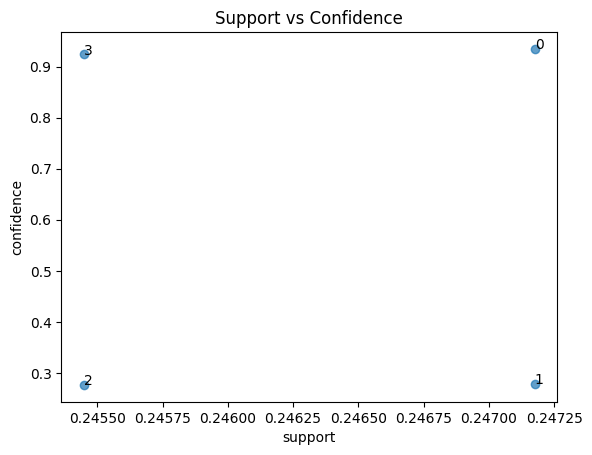

In [52]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [53]:
# group the data by 'Suspect Product Names' and count the number of occurrences
count_df = new_df.groupby('drugname').size().reset_index(name='Count')

# sort the data by 'Count' in descending order
sorted_df = count_df.sort_values(by='Count', ascending=False)

# print the top 10 results
print(sorted_df.head(10))

        drugname   Count
4      SYMBICORT  112377
6   THEOPHYLLINE    6972
0     BUDESONIDE    1438
7   Theophylline    1171
2      PULMICORT     702
5      Symbicort     248
10  theophylline      92
8     budesonide      36
1     Budesonide      35
3      Pulmicort      21


In [54]:
# filter rows where 'drugname' is 'MONTELUKAST'
namesearch_df = new_df[new_df['drugname'] == 'THEOPHYLLINE']

# print the results
print(namesearch_df)


        primaryid    caseid  caseversion i_f_code    event_dt      mfr_dt  \
102      78312174   7831217            4        F      2009.0  20130315.0   
103      78312174   7831217            4        F      2009.0  20130315.0   
104      78312174   7831217            4        F      2009.0  20130315.0   
310      85885943   8588594            3        F         NaN  20130117.0   
311      85885943   8588594            3        F         NaN  20130117.0   
...           ...       ...          ...      ...         ...         ...   
348051  186741681  18674168            1        I      2018.0  20201221.0   
348052  186741681  18674168            1        I      2018.0  20201221.0   
348053  186741681  18674168            1        I      2018.0  20201221.0   
348471   67159813   6715981            3        F  20070930.0  20081228.0   
348472   67159813   6715981            3        F  20070930.0  20081228.0   

        init_fda_dt    fda_dt rept_cod  \
102        20110228  20130318    

In [55]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [57]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
drugname_df = new_df[new_df['drugname'] == 'THEOPHYLLINE']

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('decreased', 439), ('increased', 413), ('dyspnoea', 272), ('blood', 269), ('pain', 256), ('drug', 244), ('disorder', 230), ('respiratory', 225), ('asthma', 219), ('infection', 162)]


In [58]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords



In [59]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


C:\Users\chera\AppData\Local\Temp\ipykernel_28488\2864901946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [60]:
stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\chera\AppData\Local\Temp\ipykernel_28488\2917538086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [61]:
fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [62]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


decreased: 439
increased: 413
dyspnoea: 272
blood: 269
drug: 261
pain: 256
disorder: 230
respiratory: 229
asthma: 219
infection: 162


In [63]:
for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 102:
abnormal: 1
dreams: 1
Row 103:
nightmare: 1
Row 104:
suicidal: 1
ideation: 1
Row 310:
anaemia: 1
Row 311:
atelectasis: 1
Row 312:
caesarean: 1
section: 1
Row 313:
exposure: 1
pregnancy: 1
Row 314:
grand: 1
mal: 1
convulsion: 1
Row 315:
oxygen: 1
saturation: 1
decreased: 1
Row 316:
placental: 1
disorder: 1
Row 317:
placental: 1
infarction: 1
Row 318:
pneumonia: 1
aspiration: 1
Row 319:
pyrexia: 1
Row 320:
sputum: 1
retention: 1
Row 557:
coronary: 1
artery: 1
disease: 1
Row 558:
organising: 1
pneumonia: 1
Row 559:
tuberculosis: 1
Row 937:
anxiety: 1
disorder: 1
Row 938:
circumstance: 1
information: 1
capable: 1
leading: 1
medication: 1
error: 1
Row 939:
immunodeficiency: 1
Row 940:
influenza: 1
Row 941:
pneumonia: 1
Row 1315:
abortion: 1
Row 1316:
asthma: 1
Row 1317:
caesarean: 1
section: 1
Row 1318:
exposure: 1
pregnancy: 1
Row 1319:
foetal: 1
hypokinesia: 1
Row 1320:
live: 1
birth: 1
Row 1321:
pre: 1
eclampsia: 1
Row 1322:
premature: 1
labour: 1
Row 1323:
stillbirth: 1
Row 132

In [64]:
# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


C:\Users\chera\AppData\Local\Temp\ipykernel_28488\888490968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')


dyspnoea: 222
asthma: 219
wheezing: 141
drug ineffective: 100
cough: 88
pneumonia: 82
oxygen saturation decreased: 74
blood pressure increased: 74
weight increased: 65
nasal congestion: 60
weight decreased: 55
off label use: 52
chronic obstructive pulmonary disease: 52
heart rate increased: 52
fatigue: 51
malaise: 50
vomiting: 50
productive cough: 49
hypertension: 49
nasopharyngitis: 49
chest discomfort: 47
nausea: 47
dyspnoea exertional: 46
forced expiratory volume decreased: 46
headache: 45
dizziness: 44
pyrexia: 43
influenza: 40
insomnia: 40
diabetes mellitus: 40
chest pain: 39
lower respiratory tract infection: 35
sputum discoloured: 34
pain: 33
respiratory rate increased: 33
sinusitis: 32
bronchospasm: 32
injection site pain: 31
respiratory disorder: 31
hypersensitivity: 30
arthralgia: 30
diarrhoea: 30
depression: 29
anxiety: 29
obstructive airways disorder: 29
rales: 29
respiratory acidosis: 29
staphylococcus test positive: 29
hypotension: 28
toxicity to various agents: 28
palpit

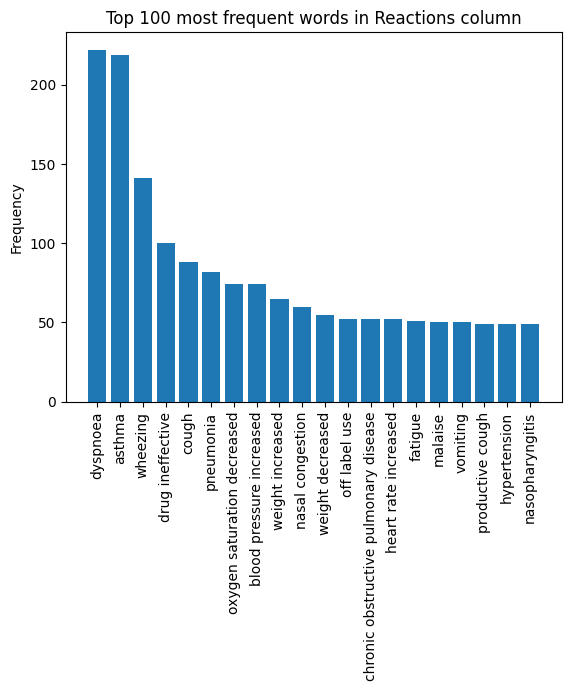

In [65]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = drugname_df['pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()
